In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('fivethirtyeight')
%matplotlib inline


In [6]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,41425,41501,41633,41728,41814,41935,41975,42033,42092,42297
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,20875,21202,21523,21904,22300,22721,23210,23705,24206,24731
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,57942,58272,58574,58979,59527,60169,60800,61381,62051,62693
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,4756,4825,4888,4910,5045,5135,5135,5319,5383,5437
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,10805,11035,11228,11577,11813,12102,12223,12335,12433,12680


In [7]:
deaths_reported= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
deaths_reported.head()



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1536,1536,1541,1544,1548,1554,1554,1556,1558,1574
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,509,518,527,532,536,543,549,557,559,571
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1964,1973,1980,1980,1999,2011,2024,2036,2048,2062
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,75,75
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,284,286,289,291,296,299,300,303,307,308


In [8]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
recovered_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34321,34326,34342,34355,34362,34440,34440,34446,34458,34721
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11189,11246,11367,11473,11578,11696,11861,12002,12092,12203
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,40201,40395,40577,40577,41001,41244,41510,41783,42037,42325
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,3475,3475,3548,3627,3734,3858,3858,4043,4248,4332
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,4523,4920,5172,5230,5266,5350,5626,5647,5899,5927


In [9]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-21-2020.csv')
latest_data.head()



,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-10-22 04:24:27,33.93911,67.709953,40510,1501,33824,5185.0,Afghanistan,104.063001,3.705258
1,NaN,NaN,NaN,Albania,2020-10-22 04:24:27,41.15330,20.168300,17948,462,10341,7145.0,Albania,623.670860,2.574103
2,NaN,NaN,NaN,Algeria,2020-10-22 04:24:27,28.03390,1.659600,55081,1880,38482,14719.0,Algeria,125.609327,3.413155
3,NaN,NaN,NaN,Andorra,2020-10-22 04:24:27,42.50630,1.521800,3811,63,2470,1278.0,Andorra,4932.375591,1.653109
4,NaN,NaN,NaN,Angola,2020-10-22 04:24:27,-11.20270,17.873900,8338,255,3040,5043.0,Angola,25.369476,3.058287


In [10]:
cols = confirmed_cases.keys()
cols 


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/31/20', '11/1/20', '11/2/20', '11/3/20', '11/4/20', '11/5/20',
       '11/6/20', '11/7/20', '11/8/20', '11/9/20'],
      dtype='object', length=297)

In [11]:
confirmed =confirmed_cases.loc[:,cols[4]:cols[-1]]
deaths=deaths_reported. loc[:,cols[4]:cols[-1]]
recoveries=recovered_cases.loc[:,cols[4]:cols[-1]]
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20
0,0,0,0,0,0,0,0,0,0,0,...,41425,41501,41633,41728,41814,41935,41975,42033,42092,42297
1,0,0,0,0,0,0,0,0,0,0,...,20875,21202,21523,21904,22300,22721,23210,23705,24206,24731
2,0,0,0,0,0,0,0,0,0,0,...,57942,58272,58574,58979,59527,60169,60800,61381,62051,62693
3,0,0,0,0,0,0,0,0,0,0,...,4756,4825,4888,4910,5045,5135,5135,5319,5383,5437
4,0,0,0,0,0,0,0,0,0,0,...,10805,11035,11228,11577,11813,12102,12223,12335,12433,12680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0,0,0,0,0,0,0,0,0,0,...,53520,54060,54775,55408,56090,56672,57226,57657,58158,58838
264,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
265,0,0,0,0,0,0,0,0,0,0,...,2063,2063,2063,2063,2063,2063,2067,2070,2070,2071
266,0,0,0,0,0,0,0,0,0,0,...,16432,16480,16543,16661,16698,16770,16819,16908,16954,16971


In [12]:
dates=confirmed.keys()
world_cases =[]
total_deaths =[]
mortality_rate =[]
recovery_rate=[]
total_recovered =[]
total_active =[]

china_cases =[]
Italy_cases =[]
us_cases =[]
spain_cases =[]
france_cases =[]
germany_cases =[]
uk_cases =[]
russia_cases =[]
india_cases = []

china_deaths =[]
Italy_deaths=[]
us_deaths=[]
spain_deaths =[]
france_deaths=[]
germany_deaths =[]
uk_deaths=[]
russia_deaths =[]
india_deaths= []

china_recoveries =[]
Italy_recoveries =[]
us_recoveries =[]
spain_recoveries =[]
france_recoveries =[]
germany_recoveries =[]
uk_recoveries =[]
russia_recoveries =[]
india_recoveries = []





In [13]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    mortality_rate.append(death_sum/confirmed_sum)


 
    
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    Italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    Italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())




In [14]:
confirmed_sum

50913976

In [15]:
death_sum

1263094

In [16]:
recovered_sum

33289404

In [17]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6167,
 8235,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30803,
 34396,
 37130,
 40160,
 42769,
 44811,
 45229,
 60382,
 66909,
 69051,
 71235,
 73270,
 75152,
 75652,
 76212,
 76841,
 78602,
 78982,
 79546,
 80399,
 81376,
 82736,
 84121,
 86014,
 88397,
 90375,
 92959,
 95276,
 98040,
 102040,
 106102,
 110062,
 114025,
 119036,
 126717,
 132506,
 146887,
 157965,
 169258,
 184002,
 199933,
 219466,
 246622,
 277257,
 309226,
 343464,
 386832,
 428304,
 479288,
 542014,
 607005,
 674387,
 733786,
 799023,
 875852,
 952378,
 1033709,
 1116962,
 1197316,
 1269293,
 1342527,
 1420267,
 1504298,
 1590779,
 1678319,
 1754535,
 1849888,
 1920033,
 1991379,
 2073252,
 2170173,
 2257986,
 2331380,
 2411352,
 2485855,
 2561734,
 2639753,
 2727810,
 2812183,
 2895430,
 2967570,
 3037260,
 3112744,
 3190206,
 3273554,
 3360744,
 3440791,
 3517314,
 3594392,
 3674847,
 3764761,
 3853781,
 3944952,
 4029875,
 4105071,
 4181946,
 4266204,
 4351024

In [18]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2008,
 2123,
 2248,
 2252,
 2459,
 2470,
 2630,
 2710,
 2771,
 2814,
 2873,
 2942,
 2996,
 3085,
 3160,
 3255,
 3348,
 3460,
 3559,
 3803,
 3987,
 4267,
 4611,
 4917,
 5414,
 5834,
 6475,
 7153,
 7964,
 8867,
 9981,
 11460,
 13181,
 14855,
 16798,
 19080,
 21878,
 24894,
 28389,
 32102,
 35572,
 39620,
 44368,
 49864,
 56101,
 62202,
 68355,
 73537,
 79478,
 87709,
 94461,
 102234,
 109626,
 115861,
 121671,
 127587,
 134564,
 142915,
 150218,
 158585,
 164598,
 169859,
 175723,
 182914,
 189641,
 196485,
 203142,
 208774,
 212708,
 217382,
 223929,
 230657,
 236657,
 241807,
 247285,
 250750,
 254843,
 260735,
 267283,
 272579,
 278054,
 282349,
 285932,
 289404,
 294925,
 299999,
 305183,
 310305,
 314483,
 317761,
 321454,
 326174,
 330936,
 335657,
 340851,
 344764,
 347881,
 349073,
 353180,
 358326,
 362944,
 367536,


In [19]:
total_recovered

[28,
 30,
 36,
 39,
 52,
 61,
 107,
 126,
 143,
 222,
 284,
 472,
 623,
 852,
 1124,
 1487,
 2011,
 2616,
 3244,
 3946,
 4683,
 5150,
 6295,
 8058,
 9395,
 10865,
 12583,
 14352,
 16121,
 18177,
 18890,
 22886,
 23394,
 25227,
 27905,
 30384,
 33277,
 36711,
 39782,
 42716,
 45602,
 48228,
 51170,
 53796,
 55865,
 58359,
 60694,
 62493,
 64404,
 67002,
 68324,
 70251,
 72622,
 76032,
 78086,
 80838,
 83321,
 84958,
 87403,
 91670,
 97885,
 98351,
 107992,
 113775,
 122145,
 130921,
 139424,
 148891,
 164337,
 177825,
 192918,
 209967,
 225415,
 245832,
 259672,
 276252,
 299643,
 328359,
 353707,
 375509,
 401766,
 421180,
 448347,
 473436,
 510106,
 540926,
 567049,
 590968,
 622623,
 644613,
 679456,
 709881,
 738661,
 788712,
 816491,
 845096,
 872865,
 906136,
 948318,
 1013284,
 1051537,
 1092416,
 1124732,
 1158819,
 1195359,
 1241365,
 1280833,
 1317383,
 1370933,
 1404527,
 1451521,
 1488542,
 1544398,
 1584114,
 1632122,
 1688714,
 1729621,
 1782542,
 1834647,
 1893575,
 19448

In [20]:
us_cases

[1,
 1,
 2,
 2,
 5,
 5,
 5,
 6,
 6,
 8,
 8,
 8,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 25,
 32,
 55,
 74,
 107,
 184,
 237,
 403,
 519,
 594,
 782,
 1147,
 1586,
 2219,
 2978,
 3212,
 4679,
 6512,
 9169,
 13663,
 20030,
 26025,
 34832,
 46052,
 56629,
 68663,
 86556,
 105196,
 124793,
 143724,
 165733,
 192101,
 217920,
 248309,
 280306,
 313304,
 341489,
 371675,
 403073,
 435089,
 469738,
 503274,
 532632,
 559591,
 585382,
 613973,
 643981,
 675504,
 708310,
 736161,
 761842,
 790264,
 816302,
 845599,
 878844,
 912596,
 943963,
 971012,
 994171,
 1018837,
 1046655,
 1076104,
 1110297,
 1138126,
 1162592,
 1185972,
 1210458,
 1235561,
 1263296,
 1290069,
 1315026,
 1333863,
 1353268,
 1375989,
 1396928,
 1424152,
 1449346,
 1473343,
 1491438,
 1513437,
 1534386,
 1557833,
 1583458,
 1606787,
 1627923,
 1647948,
 1666219,
 1685682,
 1704217,
 1727097,
 1751301,
 1775081,
 1794196,
 1811469,
 1

In [21]:
india_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950,
 150793,
 158086,
 165386,
 173491,
 181827,
 190609,
 198370,
 207191,
 216824,
 226713,
 236184,
 246622,
 257486,
 265928,
 276146,
 286605,
 297535,
 308993,
 320922,
 332424,
 343091,
 354065,
 366946,
 380532,
 395048,
 410451,
 

In [22]:
Italy_recoveries

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 3,
 45,
 46,
 46,
 83,
 149,
 160,
 276,
 414,
 523,
 589,
 622,
 724,
 724,
 1045,
 1045,
 1439,
 1966,
 2335,
 2749,
 2941,
 4025,
 4440,
 4440,
 6072,
 7024,
 7024,
 8326,
 9362,
 10361,
 10950,
 12384,
 13030,
 14620,
 15729,
 16847,
 18278,
 19758,
 20996,
 21815,
 22837,
 24392,
 26491,
 28470,
 30455,
 32534,
 34211,
 35435,
 37130,
 38092,
 40164,
 42727,
 44927,
 47055,
 48877,
 51600,
 54543,
 57576,
 60498,
 63120,
 64928,
 66624,
 68941,
 71252,
 75945,
 78249,
 79914,
 81654,
 82879,
 85231,
 93245,
 96276,
 99023,
 103031,
 105186,
 106587,
 109039,
 112541,
 115288,
 120205,
 122810,
 125176,
 127326,
 129401,
 132282,
 134560,
 136720,
 138840,
 140479,
 141981,
 144658,
 147101,
 150604,
 152844,
 155633,
 157507,
 158355,
 160092,
 160938,
 161895,
 163781,
 165078,
 165837,
 166584,
 168646,
 169939,
 171338,
 173085,
 174865,
 

In [23]:
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d

In [24]:
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
Italy_daily_increase = daily_increase(Italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
russia_daily_increase = daily_increase(russia_cases)
india_daily_increase = daily_increase(india_cases)

In [25]:
spain_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 7,
 2,
 17,
 13,
 39,
 36,
 45,
 57,
 37,
 141,
 100,
 173,
 400,
 622,
 582,
 0,
 2955,
 1159,
 1407,
 2144,
 1806,
 2162,
 4053,
 2447,
 4964,
 3394,
 6368,
 4749,
 9630,
 8271,
 7933,
 7516,
 6875,
 7846,
 7967,
 8195,
 7947,
 7134,
 6969,
 5478,
 5029,
 5267,
 6278,
 5002,
 5051,
 4754,
 3804,
 3268,
 2442,
 5103,
 7304,
 5891,
 887,
 6948,
 1536,
 3968,
 4211,
 4635,
 -10034,
 2915,
 1729,
 1831,
 1308,
 2144,
 518,
 1781,
 1366,
 884,
 545,
 1318,
 996,
 1122,
 1410,
 721,
 772,
 3086,
 594,
 661,
 849,
 643,
 515,
 0,
 908,
 431,
 518,
 482,
 1787,
 466,
 482,
 -372,
 859,
 0,
 1647,
 658,
 664,
 251,
 159,
 294,
 394,
 334,
 318,
 332,
 240,
 167,
 249,
 314,
 427,
 502,
 396,
 323,
 181,
 219,
 355,
 585,
 307,
 363,
 334,
 232,
 248,
 334,
 400,
 419,
 564,
 301,
 200,
 301,
 388,
 444,
 442,
 0,
 0,
 1244,
 341,
 383,
 543,
 852,
 0,
 0

In [26]:
germany_daily_increase

[0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 1,
 3,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 10,
 19,
 2,
 31,
 51,
 29,
 37,
 66,
 220,
 188,
 129,
 241,
 136,
 281,
 451,
 170,
 1597,
 910,
 1210,
 1477,
 1985,
 3070,
 2993,
 4528,
 2365,
 2660,
 4183,
 3930,
 4337,
 6615,
 6933,
 6824,
 4400,
 4790,
 4923,
 6064,
 6922,
 6365,
 4933,
 4031,
 3251,
 4289,
 5633,
 4885,
 3990,
 2737,
 2946,
 2218,
 1287,
 3394,
 2945,
 3699,
 1945,
 1842,
 1881,
 1226,
 2357,
 2481,
 1870,
 1514,
 1257,
 988,
 1154,
 1627,
 1470,
 1068,
 890,
 697,
 488,
 855,
 1155,
 1268,
 1158,
 736,
 555,
 697,
 595,
 927,
 380,
 755,
 519,
 617,
 182,
 1227,
 695,
 548,
 689,
 276,
 342,
 272,
 600,
 324,
 672,
 726,
 267,
 221,
 184,
 285,
 242,
 351,
 452,
 526,
 300,
 359,
 397,
 16,
 169,
 535,
 41,
 251,
 164,
 570,
 352,
 1213,
 482,
 371,
 602,
 496,
 712,
 391,
 500,
 665,
 422,
 235,
 349,
 376,
 475,
 477,
 410,
 418,
 325,
 541,
 279,
 356,
 302,
 331,
 3

In [27]:
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
Italy_daily_recovery = daily_increase(Italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
russia_daily_recovery = daily_increase(russia_recoveries)
india_daily_recovery = daily_increase(india_recoveries)

In [28]:
india_daily_recovery

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 9,
 0,
 1,
 0,
 1,
 5,
 3,
 4,
 0,
 13,
 3,
 2,
 28,
 11,
 11,
 7,
 21,
 25,
 43,
 1,
 37,
 0,
 146,
 46,
 85,
 114,
 154,
 195,
 111,
 101,
 178,
 73,
 336,
 273,
 422,
 391,
 419,
 702,
 395,
 642,
 486,
 441,
 584,
 614,
 610,
 690,
 631,
 939,
 812,
 956,
 1072,
 1295,
 1189,
 1445,
 1111,
 1414,
 1668,
 1580,
 1871,
 1980,
 1569,
 2289,
 3966,
 2571,
 2438,
 3076,
 3113,
 3131,
 3271,
 2561,
 3307,
 3014,
 3571,
 3472,
 3171,
 11707,
 4309,
 4916,
 3902,
 4531,
 3786,
 4379,
 4783,
 5462,
 5153,
 5247,
 5575,
 536,
 11989,
 7135,
 8049,
 7419,
 10215,
 6922,
 7390,
 10386,
 9120,
 13897,
 9468,
 10994,
 10495,
 13012,
 13940,
 10244,
 13832,
 12010,
 13099,
 13090,
 11948,
 20032,
 14335,
 14856,
 15350,
 15501,
 16897,
 19547,
 19135,
 19873,
 19232,
 18853,
 17989,
 205

In [29]:
world_daily_recovery

[28,
 2,
 6,
 3,
 13,
 9,
 46,
 19,
 17,
 79,
 62,
 188,
 151,
 229,
 272,
 363,
 524,
 605,
 628,
 702,
 737,
 467,
 1145,
 1763,
 1337,
 1470,
 1718,
 1769,
 1769,
 2056,
 713,
 3996,
 508,
 1833,
 2678,
 2479,
 2893,
 3434,
 3071,
 2934,
 2886,
 2626,
 2942,
 2626,
 2069,
 2494,
 2335,
 1799,
 1911,
 2598,
 1322,
 1927,
 2371,
 3410,
 2054,
 2752,
 2483,
 1637,
 2445,
 4267,
 6215,
 466,
 9641,
 5783,
 8370,
 8776,
 8503,
 9467,
 15446,
 13488,
 15093,
 17049,
 15448,
 20417,
 13840,
 16580,
 23391,
 28716,
 25348,
 21802,
 26257,
 19414,
 27167,
 25089,
 36670,
 30820,
 26123,
 23919,
 31655,
 21990,
 34843,
 30425,
 28780,
 50051,
 27779,
 28605,
 27769,
 33271,
 42182,
 64966,
 38253,
 40879,
 32316,
 34087,
 36540,
 46006,
 39468,
 36550,
 53550,
 33594,
 46994,
 37021,
 55856,
 39716,
 48008,
 56592,
 40907,
 52921,
 52105,
 58928,
 51265,
 108651,
 54971,
 55440,
 63723,
 55214,
 63393,
 66857,
 77346,
 70453,
 76320,
 54897,
 104123,
 79104,
 70053,
 69159,
 72204,
 55101,
 1

In [30]:
unique_countries = list(latest_data['Country_Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [31]:
country_confirmed_cases = []
country_death_cases = []
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = []

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
            no-cases.append(i)
            
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])
    

In [32]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries': country_recovery_cases,
                          'Mortality Rate': country_mortality_rate})

country_df.style.background_gradient(cmap='Blues')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Mortality Rate
0,US,8349049,222288,3323354,0.026624
1,India,7706946,116616,6874518,0.015131
2,Brazil,5298772,155403,4526393,0.029328
3,Russia,1438219,24786,1091264,0.017234
4,Argentina,1037325,27519,840520,0.026529
5,Spain,1005295,34366,150376,0.034185
6,France,1000369,34075,111715,0.034062
7,Colombia,981700,29464,884895,0.030013
8,Peru,874118,33875,788494,0.038753
9,Mexico,867559,87415,733897,0.100760


In [33]:
unique_provinces = list(latest_data['Province_State'].unique())

In [34]:
province_confirmed_cases = []
province_country = []
province_death_cases = []
province_recovery_cases = []
province_mortality_rate = []

no_cases = []
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)


for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])
        

In [35]:
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': province_country, 'Number of Confirmed Cases': province_confirmed_cases,
                          'Number of Deaths': province_death_cases, 'Number of Recoveries': province_recovery_cases,
                          'Mortality Rate': province_mortality_rate})

province_df.style.background_gradient(cmap='Reds')

In [36]:
nan_indices = []

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)


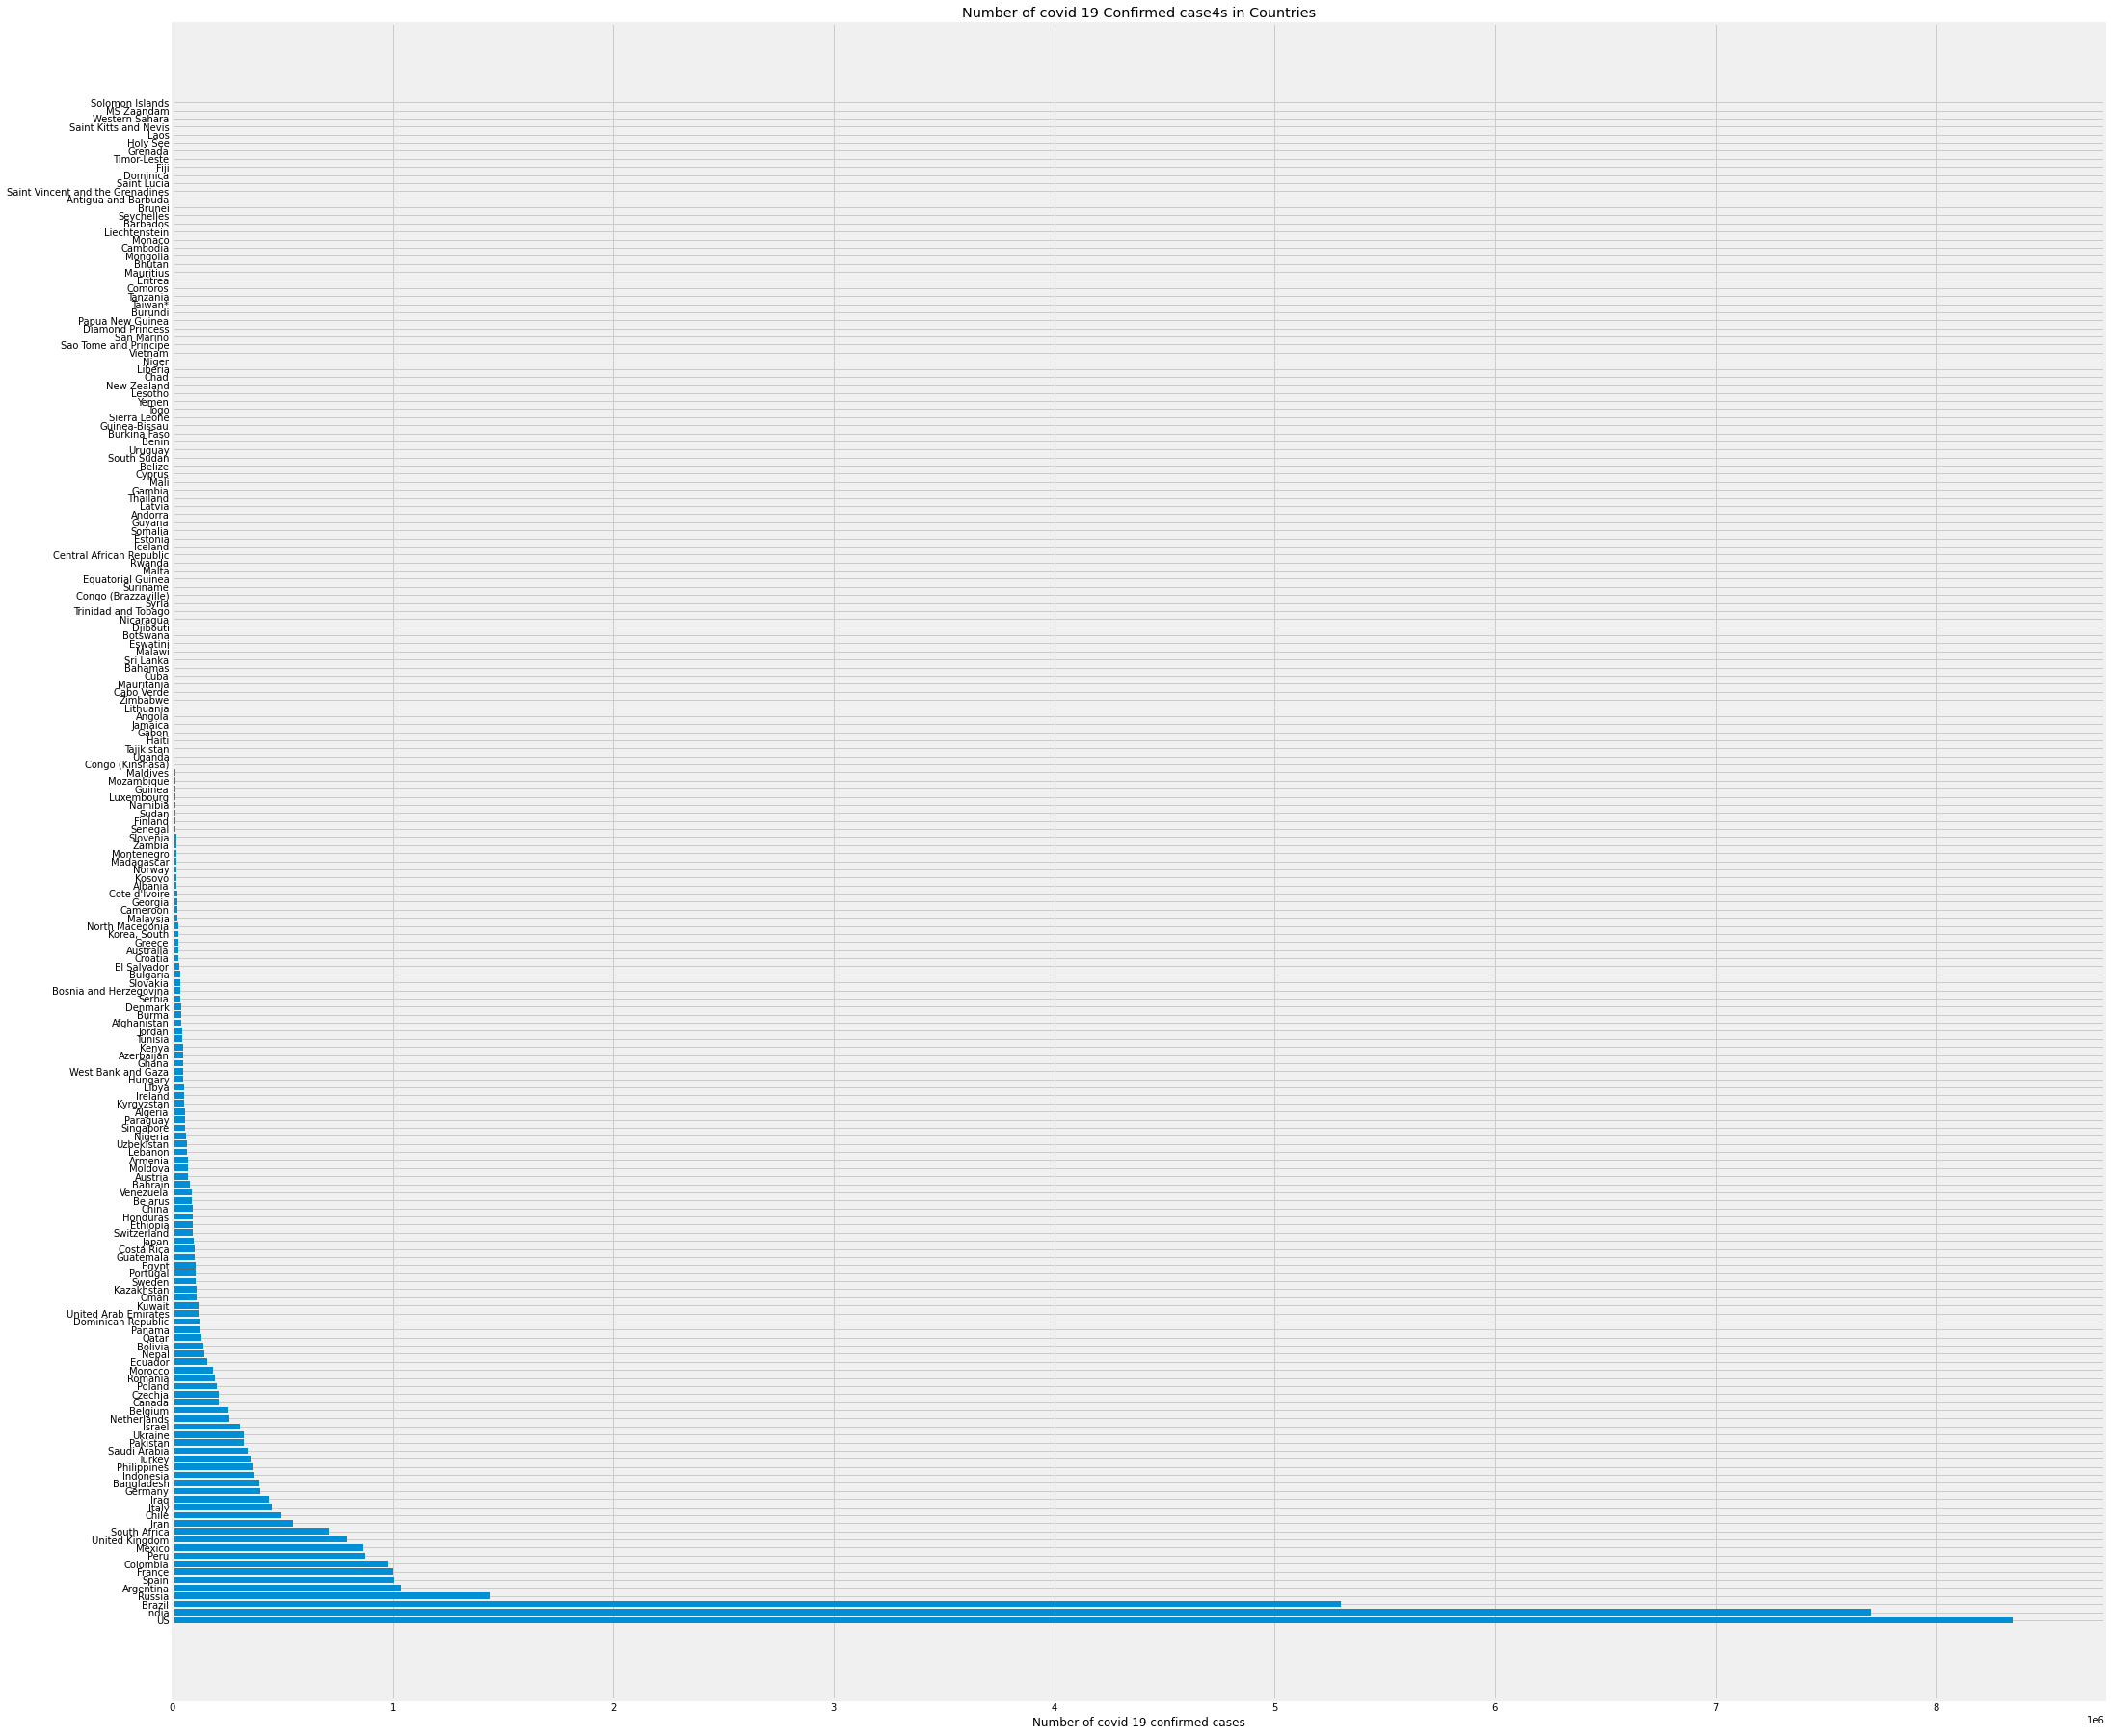

In [37]:
plt.figure(figsize=(32,32))
plt.barh(unique_countries,country_confirmed_cases)
plt.title('Number of covid 19 Confirmed case4s in Countries')
plt.xlabel('Number of covid 19 confirmed cases')
plt.show()


In [38]:
#only show 10 countries that have the most number of confirmed cases

visual_unique_countries=[]
visual_confirmed_cases=[]
others=np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append("Others")
visual_confirmed_cases.append(others)



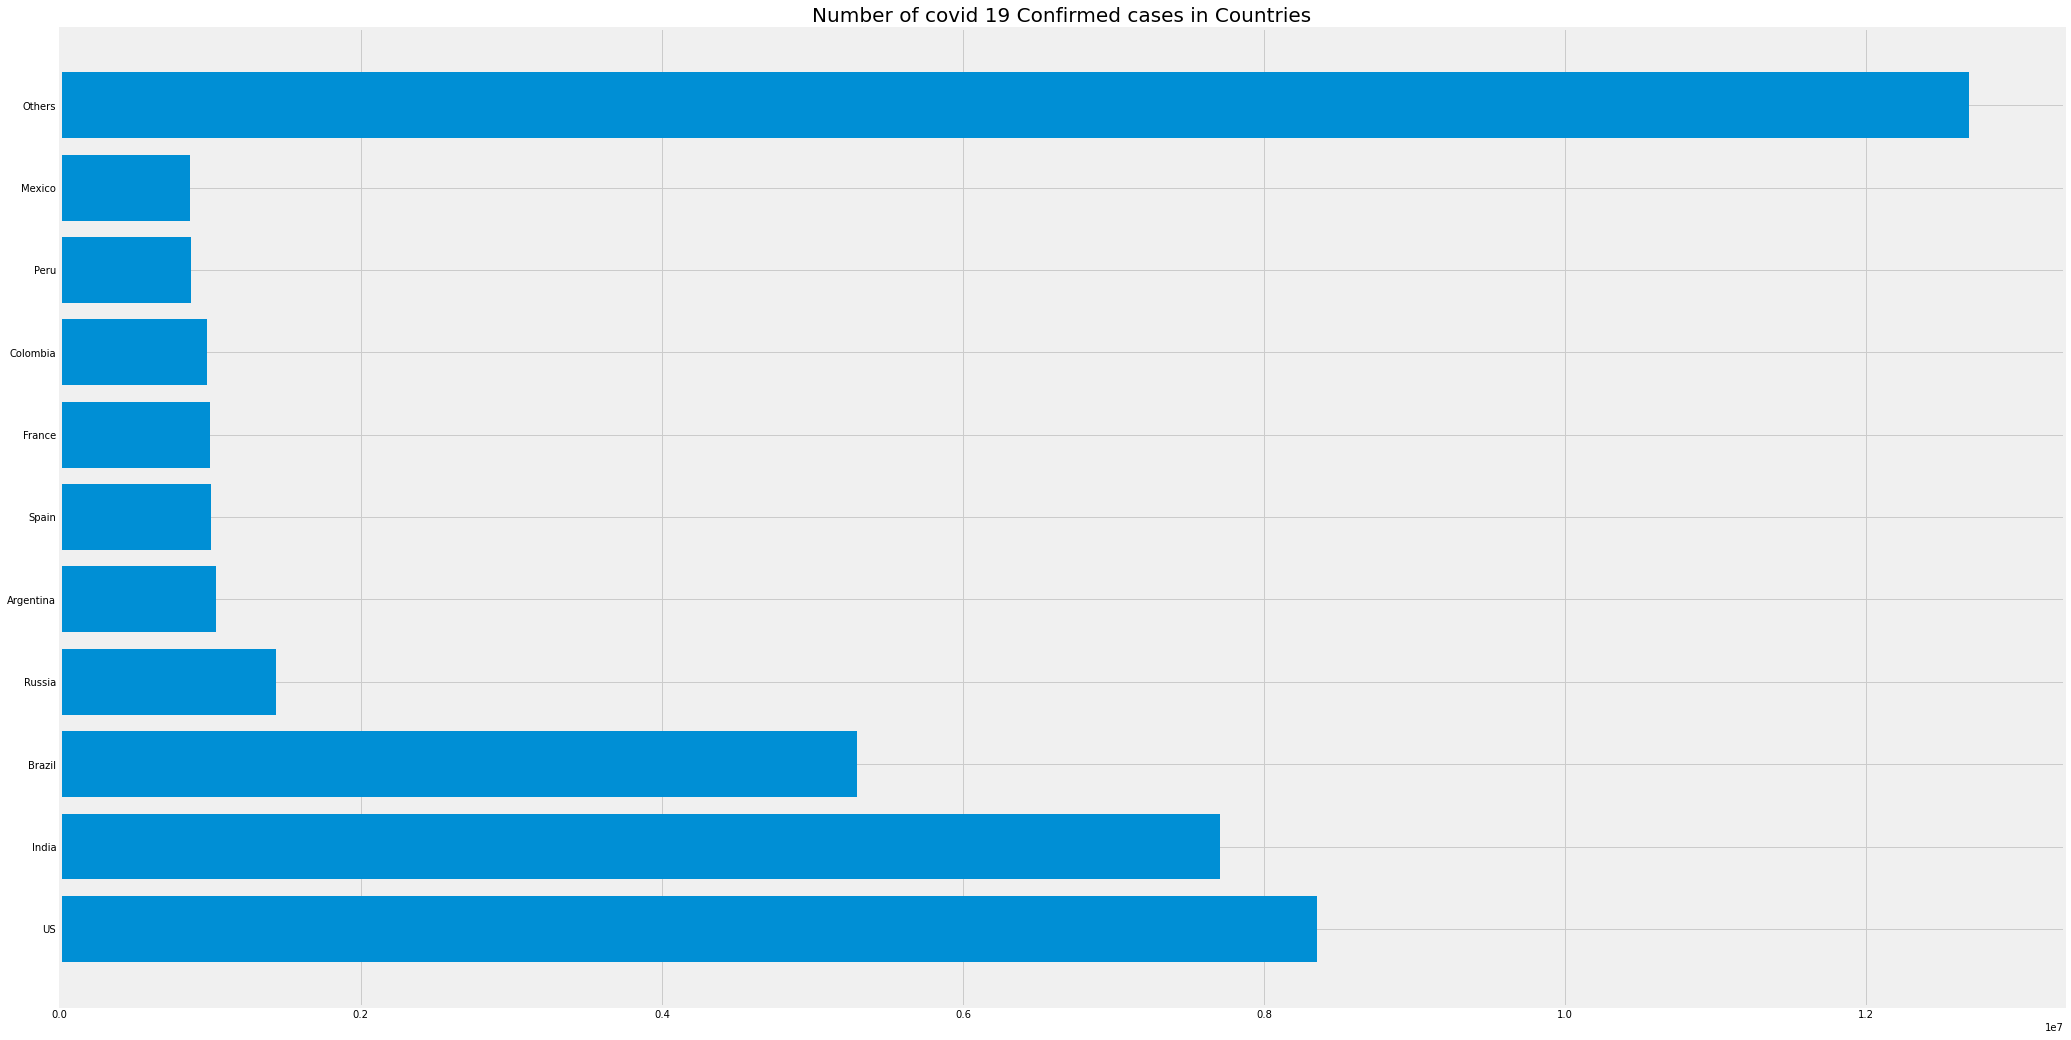

In [39]:
plt.figure(figsize=(32,18))
plt.barh(visual_unique_countries,visual_confirmed_cases)
plt.title('Number of covid 19 Confirmed cases in Countries',size=20)
plt.show()

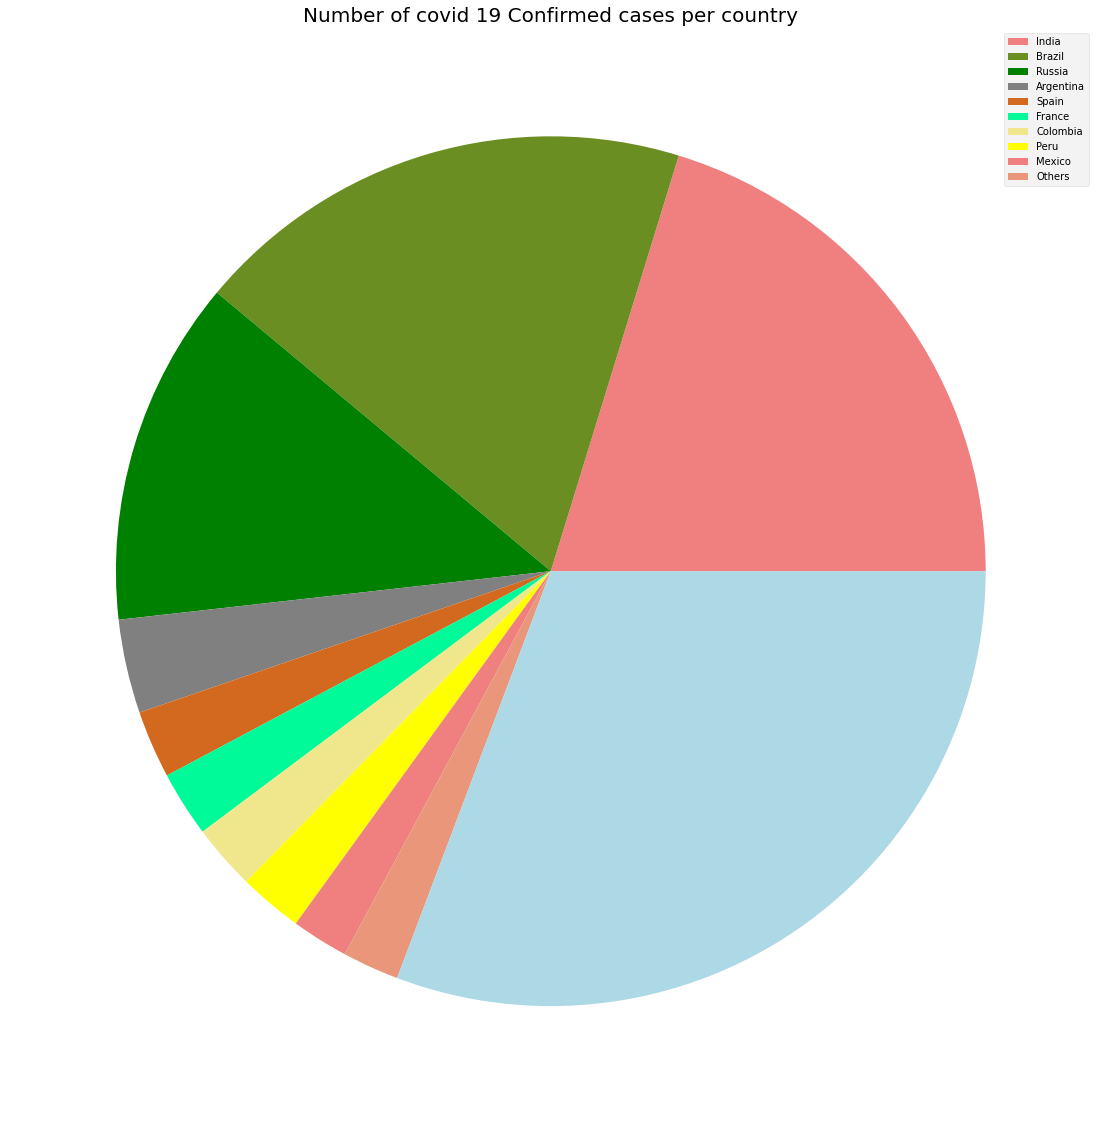

In [40]:
#Create a pie chart to see the total confirmed cases for 10 different countries

c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Number of covid 19 Confirmed cases per country',size=20)
plt.pie(visual_confirmed_cases,colors=c)
plt.legend(visual_unique_countries[1:],loc='best')
plt.show()

In [41]:
#convert all the dates and the cases in the form of numpy array
days_since_1_22=np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(-1,1)
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)

In [42]:
days_in_future=20
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[: -20]

In [43]:
start ='1/22/2020'
start_date=datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates=[]
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [44]:
X_train_confirmed, X_test_confirmed,y_train_confirmed, y_test_confirmed=train_test_split(days_since_1_22,world_cases,test_size=0.25,shuffle=False)

In [45]:
#Building SVM Model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
svm_confirmed=SVR(shrinking=True,kernel='poly',gamma=0.01,epsilon=1,degree=5,C=0.1)
svm_confirmed.fit(X_train_confirmed,y_train_confirmed)
svm_pred=svm_confirmed.predict(future_forecast)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MAE: 34817542.94921759
MSE: 1630705442402566.8


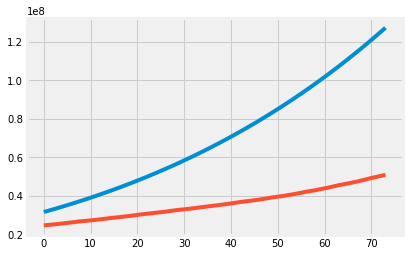

In [46]:
svm_test_pred=svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:' , mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:' , mean_squared_error(svm_test_pred, y_test_confirmed))


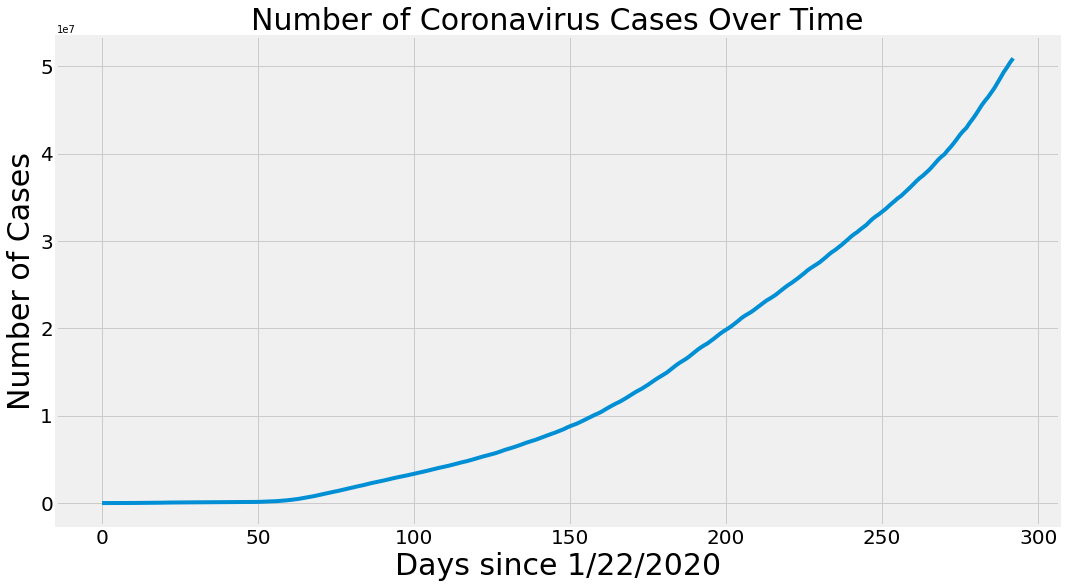

In [47]:
adjusted_dates=adjusted_dates.reshape(1,-1)[0]
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,world_cases)
plt.title('Number of Coronavirus Cases Over Time' , size=30)
plt.xlabel('Days since 1/22/2020' , size=30)
plt.ylabel('Number of Cases' , size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


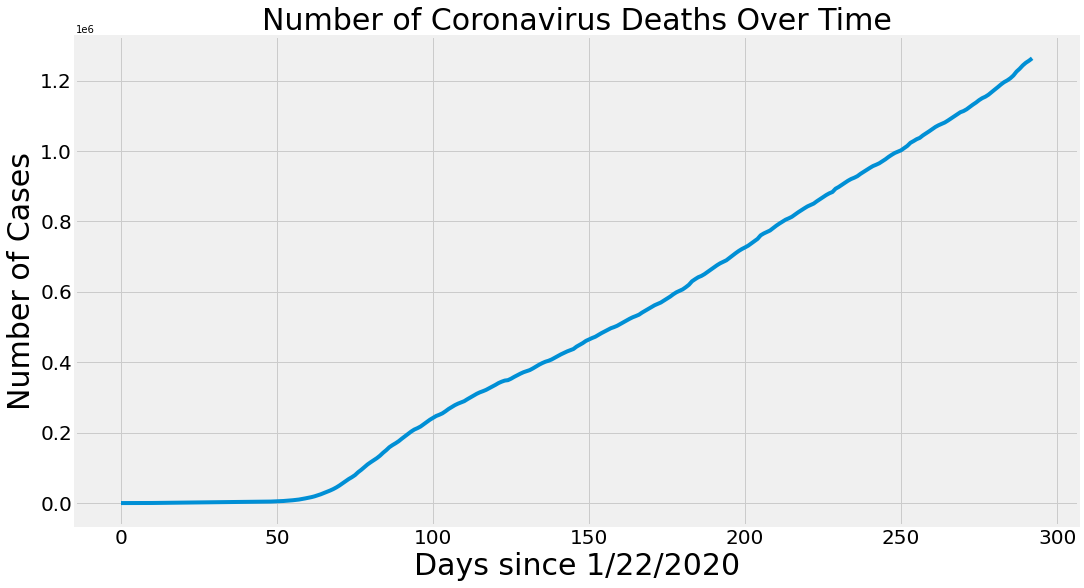

In [48]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,total_deaths)
plt.title('Number of Coronavirus Deaths Over Time' , size=30)
plt.xlabel('Days since 1/22/2020' , size=30)
plt.ylabel('Number of Cases' , size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


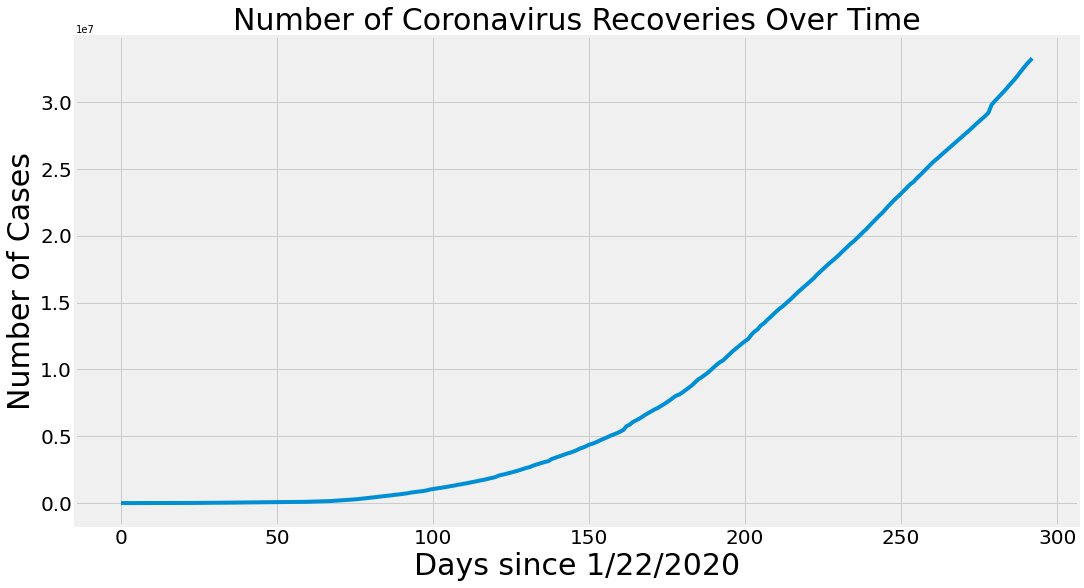

In [49]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,total_recovered)
plt.title('Number of Coronavirus Recoveries Over Time' , size=30)
plt.xlabel('Days since 1/22/2020' , size=30)
plt.ylabel('Number of Cases' , size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

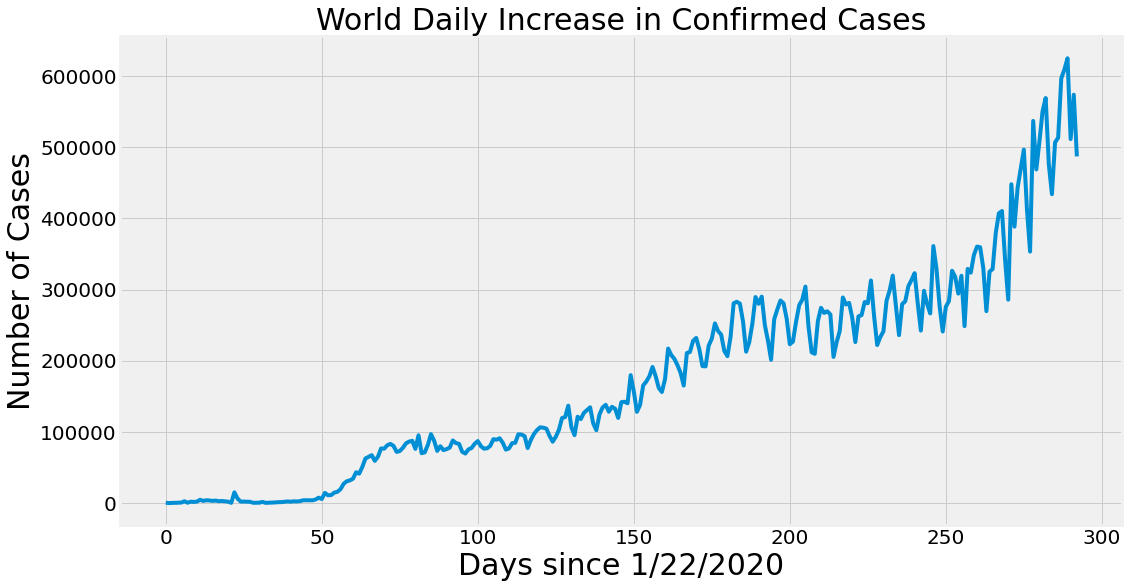

In [50]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,world_daily_increase)
plt.title('World Daily Increase in Confirmed Cases' , size=30)
plt.xlabel('Days since 1/22/2020' , size=30)
plt.ylabel('Number of Cases' , size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [51]:
def plot_predictions(x,y,pred,algo_name,color):
    plt.figure(figsize=(16,9))
    plt.plot(x,y)
    plt.plot(future_forecast,pred,linestyle='dashed',color=color)
    plt.figure(figsize=(16,9))
    plt.plot(adjusted_dates,total_recovered)
    plt.title('Number of Coronavirus Recoveries Over Time' , size=30)
    plt.xlabel('Days since 1/22/2020' , size=30)
    plt.ylabel('Number of Cases' , size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

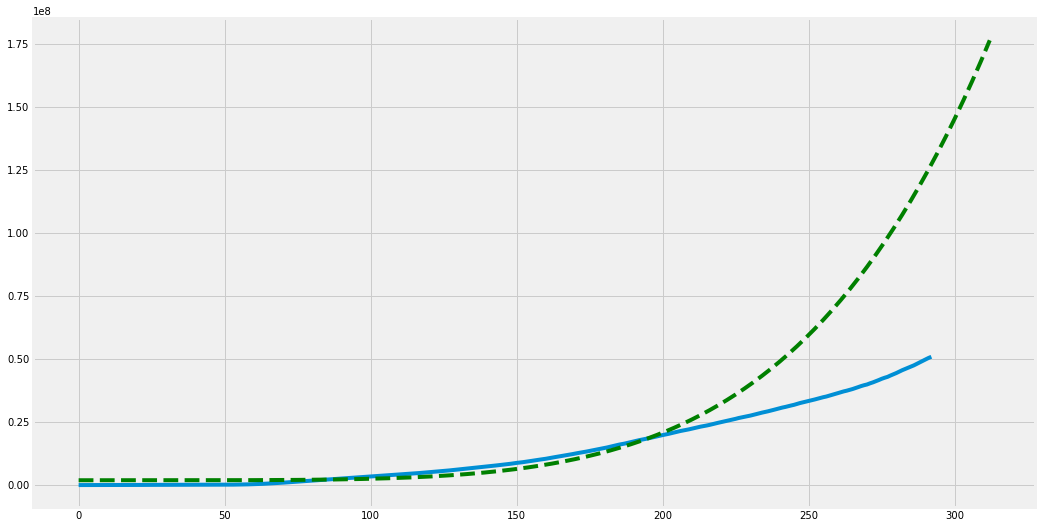

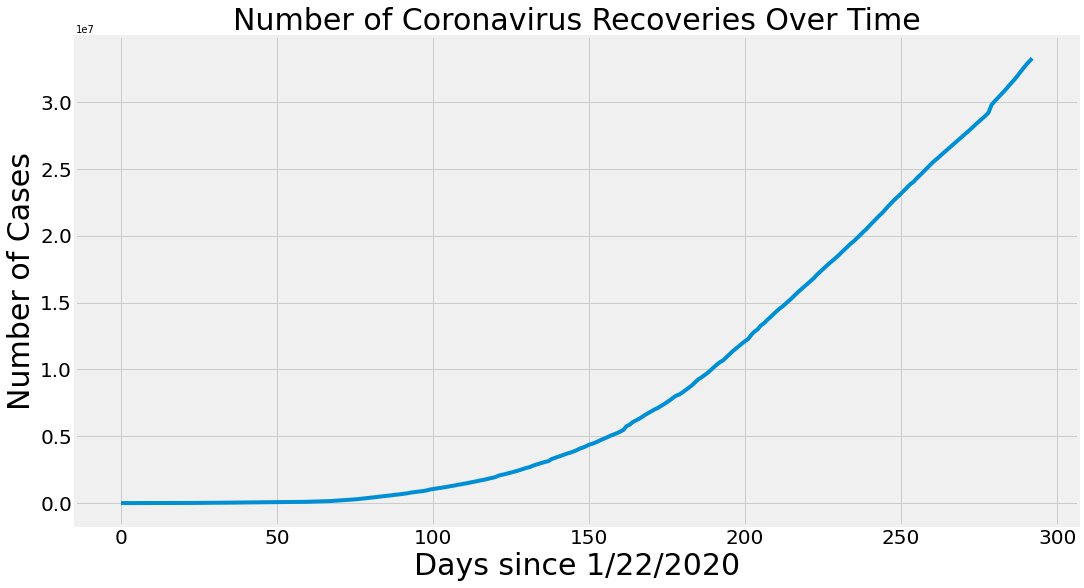

In [52]:
plot_predictions(adjusted_dates,world_cases,svm_pred,'SVM Predictions','green')